# Unstructured Data Analytics HW1

Name:Hailey Han

Andrew ID:yuehan

Collaborators (if none, say "none"; do *not* leave this blank):None

Reminder: you should not be sharing code.

**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it (as a PDF, as stated above). Again, we will *not* be re-running your code.

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size (and when you save it as a PDF, the PDF will have a crazy number of pages).**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
import glob
#print(glob.glob('./HW1_Dataset/*.txt'))

In [2]:
book_list = glob.glob('./HW1_Dataset/*.txt')
for book in book_list:
    with open(book, 'r', encoding = 'utf-8') as book_file:
        content = book_file.read()
        print(book, len(content))

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
./HW1_Dataset/The Odyssey by Homer (124).txt 697404
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 1154508
./HW1_

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [3]:
list_book_name = []
for book in book_list:
    with open(book, 'r', encoding = 'utf-8') as book_file:
        content = book_file.read()
        list_book_name.append((len(content), book))

list_book_name.sort(key = lambda x: x[0], reverse = True)

#print(list_book_name)
for i in range (15):
    print(f'{i+1}.{list_book_name[i][0]}{list_book_name[i][1]}')


1.5465100./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2.4351846./HW1_Dataset/The King James Version of the Bible (132).txt
3.3254333./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4.3227580./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5.3033575./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6.2643849./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7.1534140./HW1_Dataset/Ulysses by James Joyce (282).txt
8.1378627./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9.1238569./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10.1231784./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11.1214387./HW1_Dataset/The Republic by Plato (246).txt
12.1200021./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13.1175588./HW1_Dataset/The Iliad by Homer (256).txt
14.1167141./HW1_D

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [4]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [5]:
total_batches = 0
for book in book_list:
    with open(book, 'r', encoding = 'utf-8') as book_file:
        content = book_file.read()
    
    batches_list = split_into_batches(content,10000)
    #print(book, len(content),len(batches_list))
    total_batches += len(batches_list)
    
    
print('Total number of batches:', total_batches)

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [6]:
import re
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

pattern = re.compile('[a-zA-Z]+')

frequency = {}

for book in book_list:
    with open(book, 'r', encoding = 'utf-8') as book_file:
        content = book_file.read()
        
    batches_list = split_into_batches(content,10000)
    #print(book)
    for each_batch in batches_list:
        doc = nlp(each_batch)
        for token in doc:
            lemma = token.lemma_
            #pattern.match(lemma):
            if re.match('[a-zA-Z]+$', lemma):
                if lemma in frequency:
                    frequency[lemma] += 1
                else:
                    frequency[lemma] = 1
            
                

sort_freq = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

for i in range(50):
    print(f"Rank {i+1}: Lemma: {sort_freq[i][0]}, Frequency: {sort_freq[i][1]}")

Rank 1: Lemma: the, Frequency: 702434
Rank 2: Lemma: be, Frequency: 436048
Rank 3: Lemma: and, Frequency: 435424
Rank 4: Lemma: of, Frequency: 386347
Rank 5: Lemma: to, Frequency: 324420
Rank 6: Lemma: I, Frequency: 255123
Rank 7: Lemma: a, Frequency: 233287
Rank 8: Lemma: in, Frequency: 204241
Rank 9: Lemma: he, Frequency: 193634
Rank 10: Lemma: that, Frequency: 159010
Rank 11: Lemma: have, Frequency: 158144
Rank 12: Lemma: it, Frequency: 135425
Rank 13: Lemma: not, Frequency: 112037
Rank 14: Lemma: his, Frequency: 108538
Rank 15: Lemma: you, Frequency: 102592
Rank 16: Lemma: with, Frequency: 101227
Rank 17: Lemma: they, Frequency: 96822
Rank 18: Lemma: for, Frequency: 95302
Rank 19: Lemma: as, Frequency: 90697
Rank 20: Lemma: she, Frequency: 78229
Rank 21: Lemma: but, Frequency: 75595
Rank 22: Lemma: my, Frequency: 74017
Rank 23: Lemma: do, Frequency: 68759
Rank 24: Lemma: at, Frequency: 64950
Rank 25: Lemma: on, Frequency: 62850
Rank 26: Lemma: by, Frequency: 61504
Rank 27: Lemma: t

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

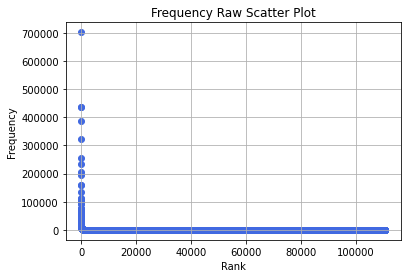

In [7]:
import matplotlib.pyplot as plt

x_ranks = list(range(1, len(sort_freq) + 1))
y_frequencies = [freq for lemma, freq in sort_freq]

#plt.figure(figsize=(10, 6))
plt.scatter(x_ranks, y_frequencies, color='royalblue')
plt.title('Frequency Raw Scatter Plot')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

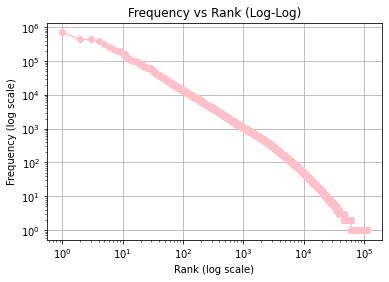

In [8]:
x_ranks = list(range(1, len(sort_freq) + 1))
y_frequencies = [freq for _, freq in sort_freq]

#plt.figure(figsize=(10, 6))
plt.loglog(x_ranks, y_frequencies, marker='o', color='pink')
plt.title('Frequency vs Rank (Log-Log)')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 

The line is almost a straight line showing the linear relationship between log(rank) and log(frenquency). This is consist with the power law. Zipf's law can be presented by log(f) = log(c) - log (r), where frlog(rank) and log(freq) are linear with the coefficient of -1. And log(c) is the intercept where c is about 100000. All features are related to the loglog plot.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [9]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')
sum_lemma = sum(frequency.values())
#print(sum_lemma)

lemma_4 = sum(freq for lemma, freq in sort_freq[:4])
print(lemma_4/sum_lemma)
#print(lemma_4)

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
lemma_50 = sum(freq for lemma, freq in sort_freq[:50])
print(lemma_50/sum_lemma)


Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.16223244412186055
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.48316939764081573


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [10]:
print("Occur only once: ")
lemma_occur1 = sum (1 for occurance in frequency.values() if occurance == 1 )
print(lemma_occur1/len(frequency))

print("Occur fewer than 10 times: ")

lemma_occur10 = sum (1 for occurance in frequency.values() if occurance < 10 )
print(lemma_occur10/len(frequency))

Occur only once: 
0.44763641616409666
Occur fewer than 10 times: 
0.7818153912823661


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

[nltk_data] Downloading package reuters to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
/Users/hanyue/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


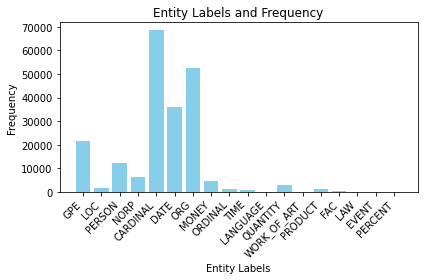

In [11]:
import nltk
reuters = nltk.download('reuters')

import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()



for doc in reuters_nlp: 
    for ent in doc.ents:
        label_counter[ent.label_] += 1


labels = list(label_counter.keys())
frequencies = list(label_counter.values())


#plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.title('Entity Labels and Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [12]:
ORG_entity = {}
GPE_entity = {}

for doc in reuters_nlp: 
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            ent_text = ent.text.lower()
            ORG_entity[ent_text] = ORG_entity.get(ent_text, 0) + 1
            
        if ent.label_ == 'GPE':
            ent_text = ent.text.lower()
            GPE_entity[ent_text] = GPE_entity.get(ent_text, 0) + 1
            
            
sort_ORG = sorted(ORG_entity.items(), key = lambda x: x[1], reverse = True)
sort_GPE = sorted(GPE_entity.items(), key = lambda x: x[1], reverse = True)

top10_ORG = sort_ORG[:10]
top10_GPE = sort_GPE[:10]

print('Top 10 ORG entities:')
for entity, freq in top10_ORG:
    print(f"{entity}: {freq}")

print('\n\n')
print('Top 10 ORG entities:')
for entity, freq in top10_GPE:
    print(f"{entity}: {freq}")

Top 10 ORG entities:
cts: 3939
ec: 795
fed: 587
reuters: 503
opec: 482
revs: 441
usda: 414
bundesbank: 341
treasury: 323
the securities and exchange commission: 253



Top 10 ORG entities:
u.s.: 3878
japan: 1441
avg: 674
the united states: 592
brazil: 480
canada: 422
u.k.: 419
paris: 348
washington: 324
china: 324


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [13]:
# for PMI: log(P(GPE&'opec')/[p(GPE)*p('opec')])
# simplify: log(P(GPE&'opec')/p(GPE)
# prob of GPE &'opec' and that specific 'GPE', amount of doc is the same, counting times(GPE&'opec') and times(GPE)

gpe_opec_counts = {}
for doc in reuters_nlp:
    if 'opec' in doc.text.lower():
        for ent in doc.ents:
            if ent.label_ == 'GPE':
                gpe_text = ent.text.lower()
                gpe_opec_counts[gpe_text] = gpe_opec_counts.get(gpe_text, 0) + 1


sort_PMI = sorted(gpe_opec_counts.items(), key = lambda x: x[1], reverse = True)
top50_PMI = sort_PMI[:50]
for entity, freq in top50_PMI:
    print(entity)

u.s.
ecuador
saudi arabia
kuwait
venezuela
indonesia
iraq
japan
qatar
vienna
nigeria
saudi arabia's
iran
norway
u.k.
the united arab emirates
balao
west germany
egypt
malaysia
the united states
canada
opec
mexico
britain
tokyo
france
colombia
libya
dubai
riyadh
algeria
turkey
brazil
london
singapore
new york
the soviet union
caracas
alaska
kuwaiti
dunham
quito
jakarta
oman
the neutral zone
washington
bahrain
sweden
kahan


Your text answer (for this question, your answer is *not* code): 


Entities like 'u.s.', 'saudi arabia', 'kuwait', 'venezuela', 'iran', 'nigeria', 'qatar' are unsurprising, since these are the countries or areas that close to OPEC.

But entities like 'london', 'tokyo', 'Japan', 'sweden' and 'west germany' are a little bit unexpected since they are not largely impacted by oil price or OPEC, and do not have a relative big speak power about international oil stuff. But it can be explained that these countries or areas are all big contributors to the global economics and opec is also connected close with the topic. So they show up together cause they are all related to the third topic like 'global economics' not cuz they are related to each other directly 

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/uYkQuh56s3LoiAFC9